# Aggregating Data
## Reading in CMAP Precipitation data set

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
file='/scratch/jcampb8/enso4_1979-2018.cmap.monthly.precip.mon.mean.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, time: 480)
Coordinates:
  * lat      (lat) float32 68.75 66.25 63.75 61.25 ... -1.25 -3.75 -6.25 -8.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    version:        V1912
    history:        update 12/2019 V1912
    data_modified:  2019-12-12

#### Re-index data to remove dimensions leaving time only

In [3]:
ds_enso_index=ds.mean(dim=['lat','lon'])
ds_enso_index

<xarray.Dataset>
Dimensions:  (time: 480)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    precip   (time) float32 2.103034 2.1284113 2.2426147 ... 2.4692857 2.1585083

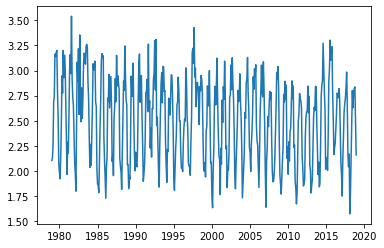

In [4]:
plt.plot(ds_enso_index['time'],ds_enso_index['precip'])

#### Use `groupby` to get anomaly data

In [5]:
ds_climo=ds_enso_index.groupby('time.month').mean()
ds_anoms=ds_enso_index.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:  (time: 480)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (time) float32 0.06385851 0.15109885 ... -0.021215677 -0.03445983

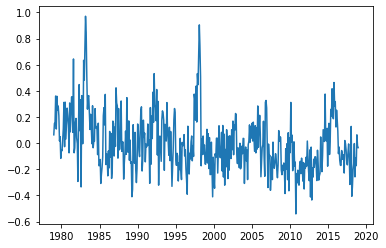

In [6]:
plt.plot(ds_anoms['time'],ds_anoms['precip'])

#### Use `rolling` to smooth out noisy data

In [7]:
ds_3m=ds_anoms.rolling(time=3,center=True).mean().dropna(dim='time')
ds_3m

<xarray.Dataset>
Dimensions:  (time: 478)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2018-11-01
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 1 ... 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    precip   (time) float32 0.12229446 0.22126512 ... -0.043206654 0.0026621423

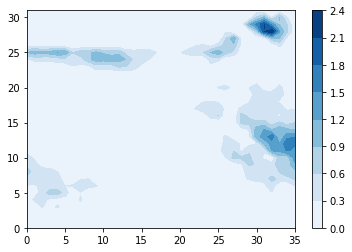

In [8]:
ds_min=ds.min(dim='time')
plt.contourf(ds_min['precip'],cmap='Blues')
plt.colorbar()

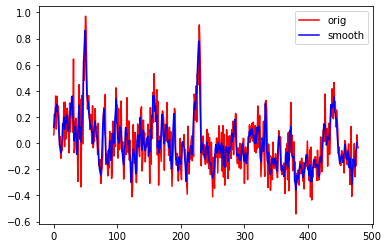

In [9]:
plt.plot(ds_anoms['precip'],color='r')
plt.plot(ds_3m['precip'],color='b')
plt.legend(['orig','smooth'])

In [10]:
ds_3m=ds_anoms.rolling(time=3,center=True).std().dropna(dim='time')
ds_3m

<xarray.Dataset>
Dimensions:  (time: 478)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2018-11-01
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 1 ... 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    precip   (time) float32 0.04132184 0.09864576 ... 0.0974837 0.043470647

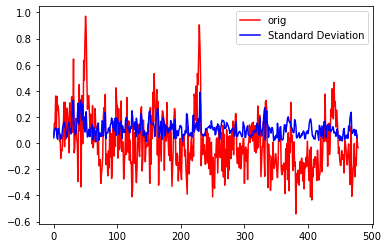

In [11]:
plt.plot(ds_anoms['precip'],color='r')
plt.plot(ds_3m['precip'],color='b')
plt.legend(['orig','Standard Deviation'])